# Implementation of cost function in a model with real world Data

### Problem Defination
we have a data of various vehicls of a town with same milege. where fuel consumed by a vehicle and distance covered by it were measured. now lets take the data and  try to predict the distance traveled by the vehicle based on amount of fuel consumed.

at first lets import necessary modules

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

now we have all the necessary modules. Lets start by importing the data. 

In [67]:
data = pd.read_csv("fuleconsumedxdistance.csv")
data.head()

,Distance_Traveled_km,Fuel_Consumed_Liters
0,218.543053,22.687871
1,477.821438,31.718519
2,379.397274,33.693405
3,319.396318,19.075889
4,120.208388,15.692203


In [68]:
X = data["Fuel_Consumed_Liters"]
y = data["Distance_Traveled_km"]
# X.shape
data.shape #Esle data ma kati ota rows ra column cha dincha

(100, 2)

### Ploting the data

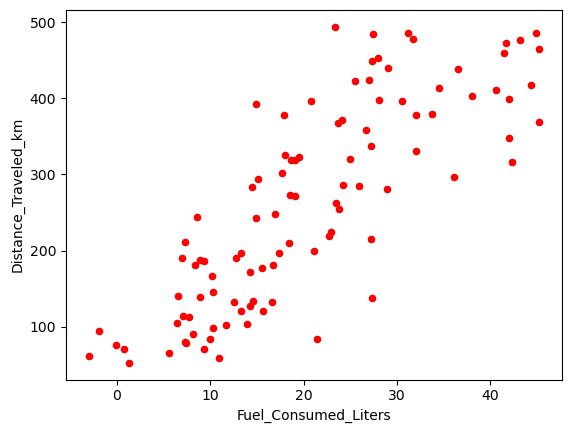

In [69]:
data.plot(kind="scatter", x="Fuel_Consumed_Liters",y="Distance_Traveled_km", color = "red")
#x ma k ko value dine tyo column ko name dine and y axis ma k rakhne tesko column ko name dine
plt.show()

### Cost function :

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

***pseudo code :***
```
m = number of training examples  
total_cost = 0  
iterate {  
  f_wb = w * x_i + b  
  cost = (f_wb - y_i)**2  
  total_cost += cost  
}  
return total_cost  
```


In [70]:
def compute_cost(X,y,w,b):
    m = X.shape[0]
    total_cost = 0;
    for i in range(m):
        f_wb = w * X[i] + b;
        diff = f_wb - y;
        cost = diff ** 2;
        total_cost += cost;
        final_cost = (total_cost) / ( 2 * m); 
    return final_cost;

using gradient descent

In [81]:

def gradient_descent(X, y, w, b, learning_rate, iterations, cost_function):
    m = X.shape[0]
    cost_history = []

    for i in range(iterations):
        predictions = w * X + b

        dw = (1 / m) * np.sum((predictions - y) * X)
        db = (1 / m) * np.sum(predictions - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost = cost_function(X, y, w, b)
        cost_history.append(cost)

        # if i % 500 == 0:
        #     print(f"Iteration {i}: Cost {cost:.4f}, w {w:.4f}, b {b:.4f}")

    return w, b, cost_history

splitting the dataset using trining set and test set

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

training the model

In [97]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 20000
tmp_alpha = 0.001
# x_train=x_train.values
# y_train=y_train.values

w_final, b_final, J_hist = gradient_descent(x_train.values ,y_train.values, w_init, b_init, tmp_alpha, iterations, compute_cost)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (  9.0053, 67.2748)


plotting the cost x iteration

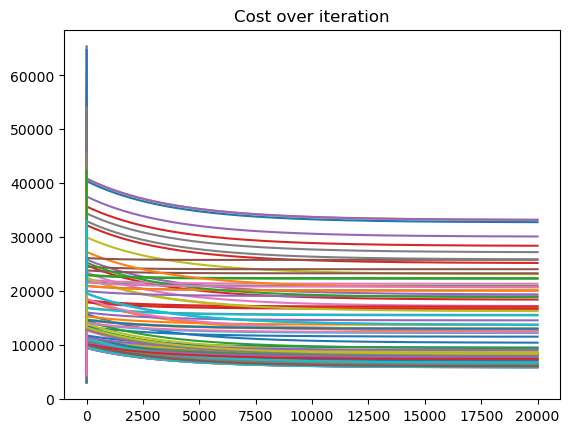

In [98]:
x_ = np.linspace(2,len(J_hist),len(J_hist))
plt.plot(x_,J_hist)
plt.title("Cost over iteration")
plt.show()

plotting the data and our regression line with training and test set

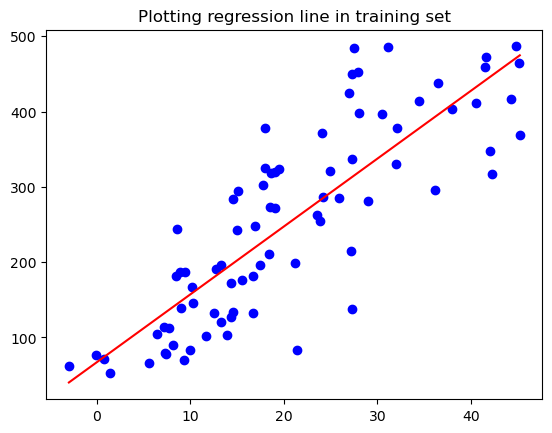

In [92]:
x_line = np.linspace(min(X),max(X),100)
y_line = w_final * x_line + b_final
plt.scatter(x_train,y_train,color = "blue")
plt.plot(x_line,y_line,color = "red")
plt.title("Plotting regression line in training set")
# plt.xlabel("Fuel consumed in litre")
# plt.ylabel("Distance traveled in km")
plt.show()

In [ ]:
plt.scatter(x_train,y_train,color = "orange")
plt.plot(x_line,y_line,color = "green")
plt.title("Plotting regression line in test set")
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

evaluation of the model

In [93]:
y_pred = w_final * x_test + b_final
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


NameError: name 'mean_absolute_error' is not defined